In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE_NAME = 'semeion.data'

# Считываем данные

Отделяем сначала пиксели(X) и лейблы(Y)

In [2]:
df = pd.read_csv(FILE_NAME, delimiter = r"\s+", header=None)
labels = df[[256 + _ for _ in range(10)]]
X = df.drop([256 + _ for _ in range(10)], axis=1)
X = np.array(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Лейблы преобразовываем в числа по номеру индекса

In [3]:
Y = []
for row in np.array(labels):
    Y.append(int(np.where(row == 1)[0]))
Y = np.array(Y)
Y

array([0, 0, 0, ..., 9, 9, 9])

Удостоверяемся в совпадении размерностей

In [4]:
X.shape, Y.shape

((1593, 256), (1593,))

Функция, которая представляет цифру по индексу в исходном массиве, а также, если нужно, предсказанное значение

True result: 3


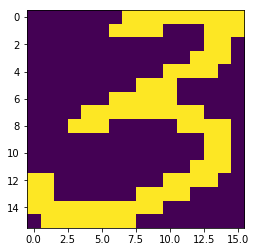

In [20]:
def show_img(index, y_pred, prediction=False):
    if prediction:
        print('True result:', y_test[index])
        print('Prediction result:', y_pred[index])
        plt.imshow(x_test[index].reshape(16,16))
    else:
        print('True result:', Y[index])
        plt.imshow(X[index].reshape(16,16))
show_img(666, 0) # 2nd arg is 0, because there are no y_pred yet

# Метод k-ближайших соседей

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Разобьем множество данных на два: обучающее и тестовое

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Создадим и обучим модель с параметрами по умолчанию

In [8]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Проверим на тестовом множестве

In [9]:
y_pred = model.predict(x_test)

Взгянем на результаты

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8934169278996865

Индексы цифр, предсказанных неверно

In [35]:
wrong_pred = np.where(y_test != y_pred)
wrong_pred

(array([ 15,  31,  37,  38,  39,  52,  59,  69,  70,  79,  90, 101, 130,
        146, 147, 150, 179, 183, 186, 191, 201, 214, 230, 250, 253, 260,
        268, 272, 274, 276, 292, 294, 299, 309], dtype=int64),)

Взгянем на одну из цифр


True result: 7
Prediction result: 4


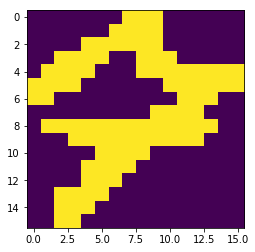

In [36]:
show_img(299, y_pred, True)

Составим и выведем матрицу несоответсвий

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'True')

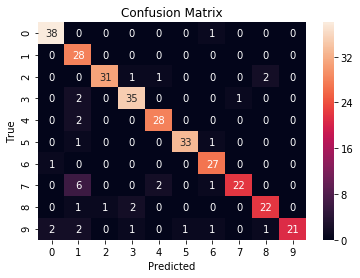

In [12]:
import seaborn as sns

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Подтюним наши данные, указав какие параметры тюним: количество ближайших соседей, веса, алгоритмы и метрики

In [13]:
from sklearn.model_selection import GridSearchCV

model_params = {'n_neighbors': np.arange(1, 11), 'weights': ['uniform', 'distance'], 
                'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                'metric': ['euclidean', 'cityblock', 'chebyshev', 'minkowski']
               }

model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)
model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1193 out of 1200 | elapsed:  1.3min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.3min finished
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'cityblock', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

Итак, наиболее точные результаты достигнуты благодаря следующим параметрам:

In [14]:
model_grid.best_params_

{'algorithm': 'brute',
 'metric': 'euclidean',
 'n_neighbors': 6,
 'weights': 'distance'}

Точность модели, обученной при новых параметрах

In [15]:
accuracy = model_grid.score(x_test, y_test)
accuracy

0.9028213166144201

# Посмотрим ошибочные значения после тюна

In [16]:
y_pred_grid = model_grid.predict(x_test)

wrong_pred_grid = np.where(y_test != y_pred_grid)
wrong_pred_grid

(array([ 15,  31,  37,  38,  39,  52,  59,  69,  70,  79, 130, 144, 147,
        150, 179, 183, 186, 191, 201, 216, 230, 250, 253, 260, 268, 274,
        276, 292, 294, 299, 314], dtype=int64),)

Взглянем на одну из цифр, также заметим, что цирфа под номером 299 все еще определяется ошибочно

True result: 4
Prediction result: 6


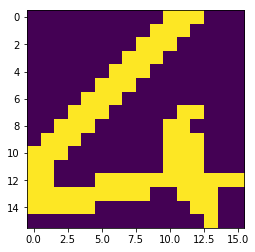

In [40]:
show_img(216, y_pred_grid, True)